## Ejercicio 02  
Código Corregido

In [6]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # alpha = # completar
    alpha = [0] * n

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z  += [((alpha[i] - h[i - 1] * z[i - 1]) / l[i])]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a  = ys[j]
        print(j, a, b, c[j], d)
        S  = a + b * (sym.Symbol("x") - xs[j]) + c[j] * (sym.Symbol("x") - xs[j])**2 + d * (sym.Symbol("x") - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines


xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

## Ejercicio 4

In [7]:
xs4 = [1,2,3]
ys4 = [2,3,5]

splines = cubic_spline(xs=xs4, ys=ys4)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

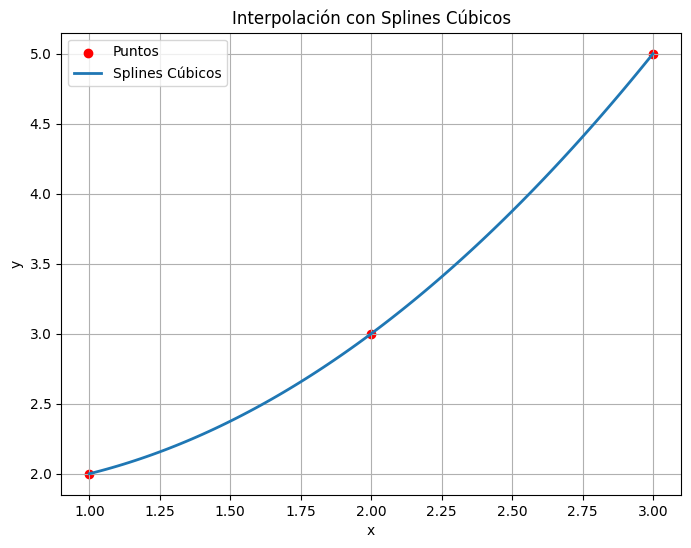

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Puntos dados
xs = np.array([1,2,3])
ys = np.array([2,3,5])

# Calcular splines cúbicos
spl = CubicSpline(xs, ys)


# Generar puntos para graficar los splines suavemente
x = np.linspace(xs[0], xs[-1], 100)
y_spline = spl(x)

# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.title('Interpolación con Splines Cúbicos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Graficar los puntos originales
plt.scatter(xs, ys, color='red', label='Puntos')

# Graficar los splines cúbicos
plt.plot(x, y_spline, label='Splines Cúbicos', linewidth=2)

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


## Ejercicio 5

In [17]:
xs5 = [0, 1, 2, 3]
ys5 = [-1 ,1, 5, 2]

splines = cubic_spline(xs=xs5, ys=ys5)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

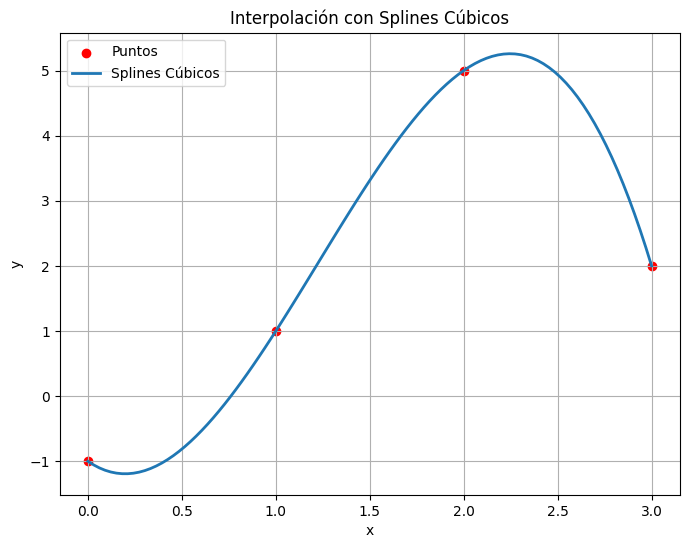

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Puntos dados
xs = np.array([0, 1, 2, 3])
ys = np.array([-1 ,1, 5, 2])

# Calcular splines cúbicos
spl = CubicSpline(xs, ys)


# Generar puntos para graficar los splines suavemente
x = np.linspace(xs[0], xs[-1], 100)
y_spline = spl(x)

# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.title('Interpolación con Splines Cúbicos')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Graficar los puntos originales
plt.scatter(xs, ys, color='red', label='Puntos')

# Graficar los splines cúbicos
plt.plot(x, y_spline, label='Splines Cúbicos', linewidth=2)

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

## Ejercicio 06

In [18]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - d0, dn: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

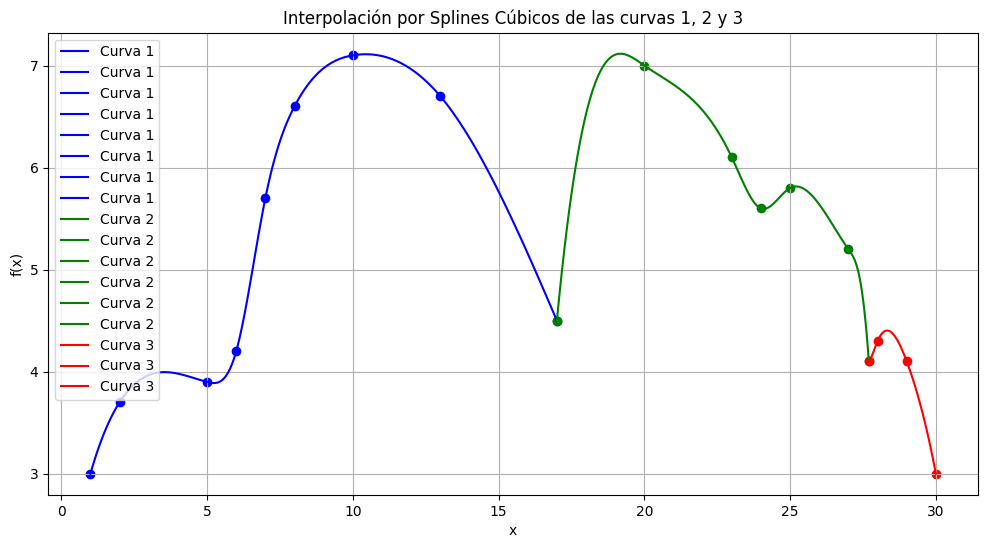

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Function for cubic spline interpolation
def cubic_spline_clamped(xs, ys, d0, dn):
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

# Datos
curva1_xs = [1, 2, 5, 6, 7, 8, 10, 13, 17]
curva1_ys = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
curva1_d0 = 1.0
curva1_dn = -0.67

curva2_xs = [17, 20, 23, 24, 25, 27, 27.7]
curva2_ys = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
curva2_d0 = 3.0
curva2_dn = -4.0

curva3_xs = [27.7, 28, 29, 30]
curva3_ys = [4.1, 4.3, 4.1, 3.0]
curva3_d0 = 0.33
curva3_dn = -1.5

# Generate splines for each curve
splines1 = cubic_spline_clamped(curva1_xs, curva1_ys, curva1_d0, curva1_dn)
splines2 = cubic_spline_clamped(curva2_xs, curva2_ys, curva2_d0, curva2_dn)
splines3 = cubic_spline_clamped(curva3_xs, curva3_ys, curva3_d0, curva3_dn)

# Define a function to evaluate the spline expressions
def eval_spline(splines, xs):
    x = sym.Symbol("x")
    results = []
    for spline, (x0, x1) in zip(splines, zip(xs, xs[1:])):
        f_spline = sym.lambdify(x, spline, "numpy")
        x_vals = np.linspace(x0, x1, 100)
        y_vals = f_spline(x_vals)
        results.append((x_vals, y_vals))
    return results

# Evaluate splines
eval1 = eval_spline(splines1, curva1_xs)
eval2 = eval_spline(splines2, curva2_xs)
eval3 = eval_spline(splines3, curva3_xs)

# Plot the splines
plt.figure(figsize=(12, 6))

# Plot for Curva 1
for x_vals, y_vals in eval1:
    plt.plot(x_vals, y_vals, label='Curva 1', color='blue')
plt.scatter(curva1_xs, curva1_ys, color='blue')

# Plot for Curva 2
for x_vals, y_vals in eval2:
    plt.plot(x_vals, y_vals, label='Curva 2', color='green')
plt.scatter(curva2_xs, curva2_ys, color='green')

# Plot for Curva 3
for x_vals, y_vals in eval3:
    plt.plot(x_vals, y_vals, label='Curva 3', color='red')
plt.scatter(curva3_xs, curva3_ys, color='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Interpolación por Splines Cúbicos de las curvas 1, 2 y 3')
plt.grid(True)
plt.show()
